# Conic Sections

```{admonition} Revised
:class: important
19 Feb 2023
```
```{contents}
```

---

## Imports & Environment

In [2]:
# %load imports.py
import numpy                    as np
import numpy.random             as npr
import pandas                   as pd

import matplotlib               as mpl
from   matplotlib import cm
from   matplotlib.patches import Ellipse
import matplotlib.pyplot        as plt
plt.style.use('ggplot');
from   matplotlib.ticker import LinearLocator

import plotly
import plotly.express           as px
import plotly.graph_objects     as go

import sympy as sy
from   sympy.geometry import Point, Line
from   sympy import (diff,
                     dsolve,
                     Eq,
                     expand,
                     factor,
                     Function,
                     init_printing,
                     Integer,
                     Integral,
                     integrate,
                     latex,
                     limit,
                     Matrix,
                     Poly,
                     Rational,
                     solve,
                     Symbol,
                     symbols)

S =Symbol
ss=symbols
x,y,z,t,u,v=ss(names='x y z t u v')
init_printing(use_unicode=True)

import math
import numexpr

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'        :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''                :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'          :<{pad}}: {s.version}")
print(f"{''                :<{pad}}: {s.version_info}")
print(f"{''                :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib'      :<{pad}}: {mpl.__version__}")
print(f"{'Numexpr'         :<{pad}}: {numexpr.__version__}")
print(f"{'NumPy'           :<{pad}}: {np.__version__}")
print(f"{'Pandas'          :<{pad}}: {pd.__version__}")
print(f"{'Plotly'          :<{pad}}: {plotly.__version__}")
print(f"{'SymPy'           :<{pad}}: {sy.__version__}")
# print()
# from pprint import PrettyPrinter
# pp = PrettyPrinter(indent=2)
# pp.pprint([name for name in dir()
#            if name[0] != '_'
#            and name not in ['In', 'Out', 'exit', 'get_ipython', 'quit']])

EXECUTED            : 2023-02-19 19:02:35.859874

Platform            : 13.2.1 | Darwin | 22.3.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
Numexpr             : 2.8.3
NumPy               : 1.24.1
Pandas              : 1.5.3
Plotly              : 5.13.0
SymPy               : 1.11.1


## Auxiliary code

In [5]:
x=np.linspace(-9,9,400)
y=np.linspace(-9,9,400)
x,y=np.meshgrid(x,y)

def axes ():
  plt.axhline(0,alpha=0.1)
  plt.axvline(0,alpha=0.1)

---

## Linear Equation


linear in $n$ variables $x_1,...,x_n$

$a_1x_1+a_2x_2+...+a_nx_n=b$

linear in two variables $x,y$

Standard Form of a Line

$Ax+By=C$

Point-Slope Form

$y-y_0=m(x-x_0)$ for point $(x_0,y_0)$ and slope $m$

Slope-Intercept Form

$y=mx+b$

$
\begin{aligned}
Ax+By=C
\implies By=-Ax+C
\implies y=-\frac{A}{B}x+\frac{C}{B}
\implies y=mx+b\,\,\,\text{where}\,\,\,m=-\frac{A}{B}\,\,\,\text{and}\,\,\,b=\frac{B}{C}
\end{aligned}
$

---

## General quadratic in a single variable

General form of a quadratic equation in a single variable $x$

$Ax^2+Bx+C=0$ where $A\ne0$

---

## General quadratic in two variables

General form of a quadratic equation in two variables $x,y$

with cross terms

$Ax^2+Bxy+Cy^2+Dx+Ey+F=0$ where $A\ne0\lor B\ne0\lor C\ne0$

without cross terms

$Ax^2+By^2+Cx+Dy+E=0$ where $A\ne0\lor B\ne0$

---

$
\begin{aligned}
Ax^2+By^2+Cx+Dy+E=0
&\implies (Ax^2+Cx)+(By^2+Dy)=-E\\
&\implies A\left(x^2+\frac{C}{A}x\right)+B\left(y^2+\frac{D}{B}y\right)=-E\\
&\implies A\left(x^2+\frac{C}{A}x+\left(\frac{C}{2A}\right)^2\right)+B\left(y^2+\frac{D}{B}y+\left(\frac{D}{2B}\right)^2\right)=-E+A\left(\frac{C}{2A}\right)^2+B\left(\frac{D}{2B}\right)^2\\
&\implies A\left(x+\frac{C}{2A}\right)^2+B\left(y+\frac{B}{2D}\right)^2=\frac{C^2}{4A}+\frac{D^2}{4B}-E\\
&\implies A\left(x+\frac{C}{2A}\right)^2+B\left(y+\frac{B}{2D}\right)^2=\frac{BC^2+AD^2-4ABE}{4AB}\\
&\implies \frac{4AB}{BC^2+AD^2-4ABE}\left(A\left(x+\frac{C}{2A}\right)^2+B\left(y+\frac{B}{2D}\right)^2\right)=1\\
&\implies \frac{4A^2B}{BC^2+AD^2-4ABE}\left(x+\frac{C}{2A}\right)^2+\frac{4AB^2}{BC^2+AD^2-4ABE}\left(y+\frac{B}{2D}\right)^2=1\\
\end{aligned}
$

---

## Parabola

just one squared term

$Ax^2+Cx+Dy+E=0$

Standard Form of a Parabola

$(y-k)=a(x-h)^2$ is $y=x^2$ shifted right $h$ units; shifted up $k$ units; and stretched vertically by a factor of $a$; with vertex $(h,k)$

as a function

$y=a(x-h)^2+k$

find the vertex via differentiation to see where the graph has a horizontal tangent line

$
\begin{aligned}
y
&=a(x-h)^2+k\\
&=ax^2-2ahx+ah^2+k\implies\\
y'&=2ax-2ah\\
0&=2ax-2ah\implies\\
x&=h\implies y=k\\
\end{aligned}
$

complete the square in the squared variable to find the vertex

plug the vertex into the equation $y=ax^2+bx+c$ to find the y-intercept

factor the equation to find any roots

a parabola has an axis of symmetry through its vertex; therefore, any point on one side of the parabola is informative of a point on the other side

when the squared variable is y, then the graph is a shifted and stretched version of $x=y^2$

in this case, the parabola always has an x-intercept and the roots of the parabola are y-intercepts

---

[EXAMPLE]

$
\begin{aligned}
2x^2-4x-y=6
&\implies y+6=2x^2-4x\\
&\implies y+6=2(x^2-2x)\\
&\implies y+6=2((x-1)^2-1)\\
&\implies y+6=2(x-1)^2-2\\
&\implies y+8=2(x-1)^2\\
\end{aligned}
$

vertex

$(h,k)=(1,-8)$

$
\begin{aligned}
2x^2-4x-y=6
&\implies y=2x^2-4x-6\\
x=0&\implies y=-6\\
\end{aligned}
$

y-intercept

$(0,y)=(0,-6)$

$
\begin{aligned}
2x^2-4x-y=6
&\implies y=2x^2-4x-6\\
&\implies y=2(x^2-2x-3)\\
&\implies y=2(x-3)(x+1)\\
\end{aligned}
$

roots (x-intercepts)

$x-3=0\implies x=3$

$x+1=0\implies x=-1$

by symmetry

$(2h,y)=(2,-6)$

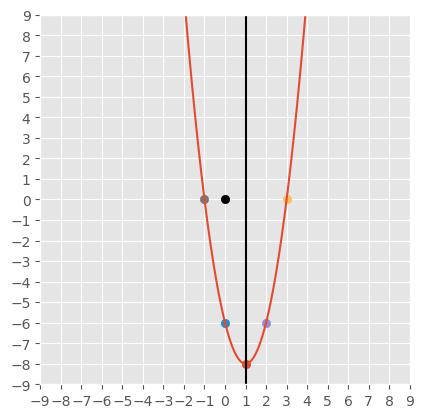

In [6]:
s=9
x=np.linspace(-s,s,1001);
y=2*x**2-4*x-6

plt.axes().set_aspect(1);
plt.xlim((-s,s));
plt.xticks(np.arange(-s,s+1,1));
plt.ylim((-s,s));
plt.yticks(np.arange(-s,s+1,1));

plt.plot(x,y);
plt.scatter(0,0,color='black');
plt.axvline(x=1,color='black');
plt.scatter( 1,-8);
plt.scatter( 0,-6);
plt.scatter( 2,-6);
plt.scatter(-1, 0);
plt.scatter( 3, 0);

---

[EXAMPLE]

$
\begin{aligned}
x+4y=y^2+5
&\implies x=y^2-4y+5\\
&\implies x=(y-2)^2+1\\
&\implies x-1=(y-2)^2\\
\end{aligned}
$

vertex

$(h,k)=(1,2)$

$
\begin{aligned}
x+4y=y^2+5
&\implies x=y^2-4y+5\\
y=0&\implies x=5\\
\end{aligned}
$

x-intercept

$(x,0)=(5,0)$

roots (y-intercepts)

$
\begin{aligned}
y=\frac{-b\pm\sqrt{b^2-4ac}}{a^2}
&\implies y=\frac{-(-4)\pm\sqrt{(-4)^2-4(1)(5)}}{(1)^2}\\
&\implies y=4\pm\sqrt{16-20}\\
&\implies y=4\pm2\sqrt{-1}\\
&\implies y=4\pm2i\\
\end{aligned}
$

by symmetry

$(x,2k)=(5,4)$

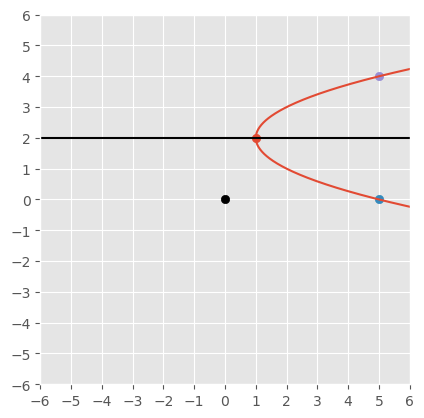

In [7]:
s=6
y=np.linspace(-s,s,1001);
x=y**2-4*y+5

plt.axes().set_aspect(1);
plt.xlim((-s,s));
plt.xticks(np.arange(-s,s+1,1));
plt.ylim((-s,s));
plt.yticks(np.arange(-s,s+1,1));

plt.plot(x,y);
plt.scatter(0,0,color='black');
plt.axhline(y=2,color='black');
plt.scatter(1,2);
plt.scatter(5,0);
plt.scatter(5,4);

---

$
y^2=4ax
$
where $a\gt0$

focus $(a,0)$

directrix $x=-a$

### Example in standard position

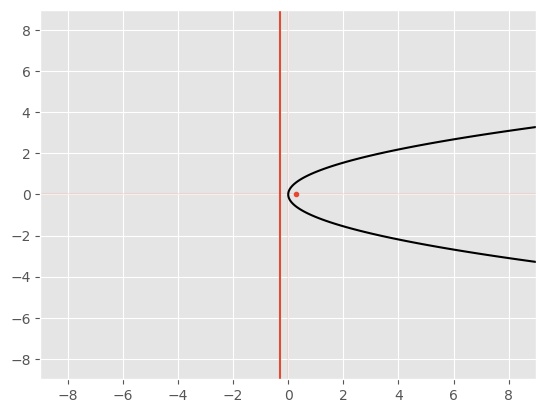

In [3]:
x=np.linspace(-9,9,400)
y=np.linspace(-9,9,400)
x,y=np.meshgrid(x,y)

def axes ():
  plt.axhline(0,alpha=0.1)
  plt.axvline(0,alpha=0.1)

a=0.3
axes()
plt.contour(x,y,y**2-4*a*x,[0],colors='k');
# focus
plt.plot(a,0,'.');
# directrix
plt.axvline(-a);

### Example in non standard position

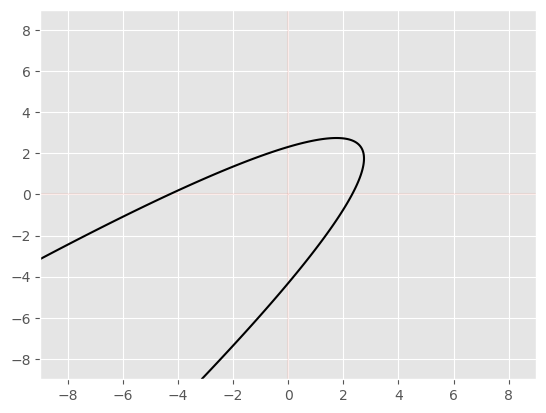

In [4]:
a,b,c,d,e,f=1,-2,1,2,2,-10
assert b**2-4*a*c==0

general=a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

axes()
plt.contour(x,y,general,[0],colors='k');

---

## Ellipse & Circle

Start with the general quadratic in two variables ignoring cross terms

$
Ax^2+Bx^2+Cx+Dy+E=0
$
where $A\ne0\lor B\ne0$

Complete the square in each variable separately to transform the general equation into the standard form of an ellipse.

Standard Form of an Ellipse

$
\begin{aligned}
\left(\frac{x-h}{a}\right)^2+\left(\frac{y-k}{b}\right)^2=1
\end{aligned}
$

$(h,k)$ center

$a$ horizontal stretch factor

$b$ vertical stretch factor

an ellipse centered at the origin

$
\begin{aligned}
\frac{x^2}{a^2}+\frac{y^2}{b^2}=1
\end{aligned}
$

given the center of an ellipse
* plug the x-coordinate of the center of the ellipse into the equation of the ellipse to find the y-coordinates of two points on the ellipse
* plut the y-coordinate of the center of the ellipse into the equation of the ellipse to find the x-coordinates of two points on the ellipse

if $a=b=r$, then the graph is a circle with radius $r$

$
\begin{aligned}
\frac{x^2}{r^2}+\frac{y^2}{r^2}=1
\implies
x^2+y^2=r^2
\end{aligned}
$

Unit Circle (radius $r=1$)

$x^2+y^2=1$

center $(0,0)$

[CASE]

Point (or Circle of radius $r=0$)

[EXAMPLE]

$
\begin{aligned}
(x-3)^2+(y+2)^2=0
&\implies
(x-3)^2=0
\land
(y+2)^2=0\\
&\implies
x-3=0
\land
y+2=0\\
&\implies
x=3
\land
y=-2\\
\end{aligned}
$

the only way for two square values to sum to zero is for each square itself to be equal to zero

[CASE]

DNE (or Circle with negative radius $r$)

[EXAMPLE]

$
\begin{aligned}
(x+4)^2+(y-1)^2=-2
\end{aligned}
$

two square values cannot sum to a negative number

---

[EXAMPLE]

$
\begin{aligned}
4x^2+y^2=6y-5
&\implies4x^2+y^2-6y=-5\\
&\implies4(x^2)+(y^2-6y)=-5\\
&\implies4(x^2)+(y^2-6y+9)=-5+9\\
&\implies4(x^2)+(y-3)^2=4\\
&\implies x^2+\left(\frac{y-3}{2}\right)^2=1\\
\end{aligned}
$

center $(0,3)$

$a=1$

$b=2$

$
\begin{aligned}
x=0
&\implies
y^2-6y+5=0\\
&\implies(y-5)(y-1)=0\\
&\implies y-5=0\land y-1=0\\
&\implies y=5\land y=1\\
\end{aligned}
$

$
\begin{aligned}
y=3
&\implies
4x^2+(3)^2-6(3)=-5\\
&\implies
x^2=1\\
&\implies
x=\pm1\\
\end{aligned}
$

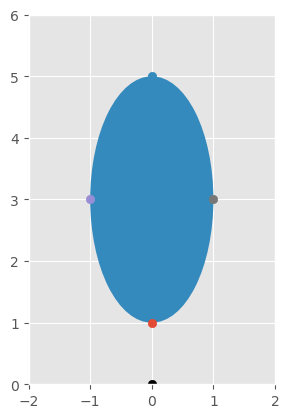

In [8]:
h,k,a,b=0,3,1,2

fig,ax=plt.subplots(subplot_kw={'aspect':'equal'});
ax.add_artist(
  Ellipse(xy    =(h,k),
          width =2*a,
          height=2*b)
);
plt.scatter(0,0,color='black');
ax.set_xlim(h-a-1,h+a+1);
ax.set_ylim(k-b-1,k+b+1);

plt.scatter( 0,1);
plt.scatter( 0,5);
plt.scatter(-1,3);
plt.scatter( 1,3);

---

[EXAMPLE]

$
\begin{aligned}
9x^2+4y^2-54x+8y+49=0
&\implies
(9x^2-54x)+(4y^2+8y)=-49\\
&\implies
9(x^2-6x)+4(y^2+2y)=-49\\
&\implies
9(x^2-6x+9)+4(y^2+2y+1)=-49+81+4\\
&\implies
9(x-3)^2+4(y+1)^2=36\\
&\implies
\left(\frac{x-3}{2}\right)^2+\left(\frac{y+1}{3}\right)^2=1\\
\end{aligned}
$

$(3,-1)$ center

$a=2,b=3$

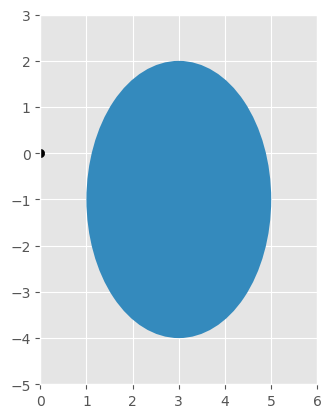

In [9]:
h,k,a,b=3,-1,2,3

fig,ax=plt.subplots(subplot_kw={'aspect':'equal'});
ax.add_artist(
  Ellipse(xy    =(h,k),
          width =2*a,
          height=2*b)
);
plt.scatter(0,0,color='black');
ax.set_xlim(h-a-1,h+a+1);
ax.set_ylim(k-b-1,k+b+1);

# plt.scatter();
# plt.scatter();
# plt.scatter();
# plt.scatter();

---

## Hyperbola

Start with the general quadratic in two variables ignoring cross terms

$
Ax^2+Bx^2+Cx+Dy+E=0
$
where $A\ne0\lor B\ne0$


Standard Forms of a Hyperbola

$
\begin{aligned}
\left(\frac{x-h}{a}\right)^2-\left(\frac{y-k}{b}\right)^2&=1\\
\left(\frac{y-k}{b}\right)^2-\left(\frac{x-h}{a}\right)^2&=1\\
\end{aligned}
$

---